In [1]:
import cifar10
import download

from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import ensemble
from sklearn.naive_bayes import GaussianNB
import time as time
import numpy as np

In [2]:
# disable Certificate issue on Mac
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
cifar10.data_path = "data/CIFAR-10/"

cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [5]:
# for i in range(1):
#     for j in range(32):
#         for k in range(32):
#             print(images_train[i][j][k])
images_train
cls_train.shape
labels_train.shape
# print(labels_train[-50:])

(50000, 10)

In [20]:
images_train.shape

(50000, 32, 32, 3)

In [6]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

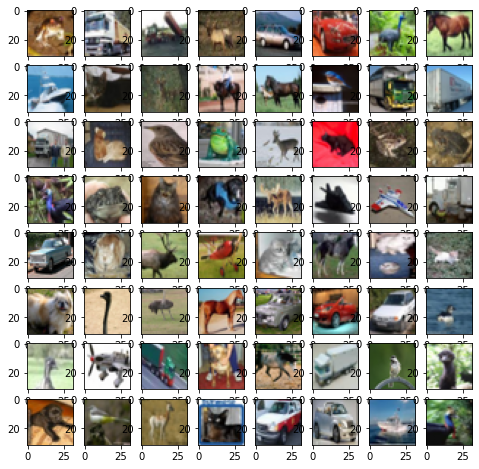

In [7]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(images_train[i])
plt.show()

In [8]:
x_train = images_train.reshape((50000,32*32*3))
x_test = images_test.reshape((10000,32*32*3))
y_train = cls_train
y_test = cls_test

In [9]:
x_train_d= images_train.reshape(images_train.shape[0],-1)
x_test_d = images_test.reshape(images_test.shape[0], -1)
y_train = cls_train
y_test = cls_test
x_train_d.shape

(50000, 3072)

In [10]:
from sklearn import preprocessing
x_train_scaled = preprocessing.scale(x_train)
x_test_scaled = preprocessing.scale(x_test)

In [11]:
pca = PCA()
pca.fit(x_train_d)

PCA()

In [12]:
k = 0
total = sum(pca.explained_variance_)
currentSum = 0
while currentSum/total < 0.99:
    currentSum+=pca.explained_variance_[k]
    k+=1
k

658

In [13]:
pca_k = PCA(n_components=k,whiten=True)
transformed_data = pca_k.fit_transform(x_train_d)
transformed_data.shape

(50000, 658)

In [14]:
x_approx = pca_k.inverse_transform(transformed_data)
x_approx.shape

(50000, 3072)

In [52]:
x_approx_images = x_approx.reshape((50000,32,32,3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

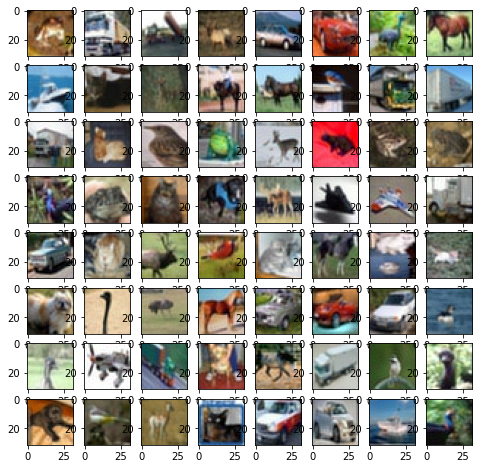

In [53]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i])
plt.show()

In [15]:
x_train_pca = transformed_data
x_test_pca = pca_k.transform(x_test_d)

In [16]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train_scaled,y_train)
print(time.time()-start)
y_pred = rf.predict(x_test_scaled)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

NameError: name 'x_train_scaled' is not defined

In [19]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train_pca,y_train)
print(time.time()-start)
y_pred_pca = rf.predict(x_test_pca)
print(classification_report(y_test,y_pred_pca))
print(confusion_matrix(y_test,y_pred_pca))

166.29348874092102
              precision    recall  f1-score   support

           0       0.46      0.49      0.47      1000
           1       0.42      0.51      0.46      1000
           2       0.29      0.27      0.28      1000
           3       0.28      0.25      0.26      1000
           4       0.36      0.36      0.36      1000
           5       0.33      0.31      0.32      1000
           6       0.47      0.47      0.47      1000
           7       0.44      0.34      0.39      1000
           8       0.49      0.56      0.52      1000
           9       0.40      0.41      0.40      1000

    accuracy                           0.40     10000
   macro avg       0.39      0.40      0.39     10000
weighted avg       0.39      0.40      0.39     10000

[[488  64  60  37  34  31  28  36 163  59]
 [ 39 507  20  45  20  39  23  37  73 197]
 [114  53 265  80 177  74 102  49  57  29]
 [ 65  61 104 247  82 185  98  56  43  59]
 [ 44  28 163  71 365  63 124  78  44  20]
 [ 54  

In [28]:
clf = GaussianNB()
start = time.time()
clf.fit(x_train_scaled,y_train)
print(time.time()-start)
y_pred_nb = clf.predict(x_test_scaled)
print(classification_report(y_test,y_pred_nb))
print(confusion_matrix(y_test,y_pred_nb))

4.076618909835815
              precision    recall  f1-score   support

           0       0.28      0.49      0.35      1000
           1       0.40      0.17      0.23      1000
           2       0.17      0.07      0.10      1000
           3       0.24      0.08      0.12      1000
           4       0.24      0.41      0.30      1000
           5       0.32      0.26      0.29      1000
           6       0.25      0.47      0.33      1000
           7       0.42      0.13      0.20      1000
           8       0.39      0.47      0.42      1000
           9       0.38      0.41      0.39      1000

    accuracy                           0.30     10000
   macro avg       0.31      0.30      0.27     10000
weighted avg       0.31      0.30      0.27     10000

[[490  20  38  10  84  34  53  10 200  61]
 [134 166  23  34  67  71 196  18 118 173]
 [221  24  70  16 302  49 216  21  53  28]
 [159  36  53  76 153 126 269  27  34  67]
 [ 84   8  52  28 411  38 276  21  48  34]
 [154  1

In [1]:
from sklearn.linear_model import LogisticRegression
start = time.time()
alg1 = LogisticRegression()
alg1.fit(x_train_pca,y_train)
print(time.time()-start)
y_pred_linear = alg1.predict(x_test_pca)
print(classification_report(y_test,y_pred_linear))
print(confusion_matrix(y_test,y_pred_linear))

NameError: name 'time' is not defined

In [20]:
from sklearn import svm
svc = svm.SVC()
svc.fit(x_train_pca, y_train)
print(time.time()-start)


2234.6317048072815


NameError: name 'clf' is not defined

In [21]:
y_pred_svm = svc.predict(x_test_pca)
print(classification_report(y_test,y_pred_svm))
print(confusion_matrix(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.56      0.53      0.54      1000
           1       0.49      0.63      0.55      1000
           2       0.39      0.35      0.37      1000
           3       0.35      0.35      0.35      1000
           4       0.45      0.37      0.40      1000
           5       0.40      0.37      0.38      1000
           6       0.55      0.52      0.53      1000
           7       0.57      0.51      0.54      1000
           8       0.64      0.59      0.62      1000
           9       0.46      0.61      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.48     10000
weighted avg       0.48      0.48      0.48     10000

[[528  73  54  28  20  13  16  22 144 102]
 [ 40 634  11  20  12  20  20  26  27 190]
 [ 86  45 355  81 116  84  97  57  26  53]
 [ 21  64  88 354  60 192  94  45  21  61]
 [ 36  25 153  86 370  85 100  89  24  32]
 [ 18  50  90 215  81 368 

In [23]:
# y_pred_cls = np.array([class_names[y_pred[i]] for i in range(len(y_pred))])
# y_pred_pca_cls = np.array([class_names[y_pred_pca[i]] for i in range(len(y_pred_pca))])
y_pred_svm_cls = np.array([class_names[y_pred_pca[i]] for i in range(len(y_pred_svm))])
# y_pred_cls.shape

In [143]:
y_pred_cls.tofile('y_pred_cfar.csv', sep = ',')

In [24]:
import pandas as pd
df = pd.DataFrame(y_pred_svm_cls)
df.to_csv('y_pred_cfar.csv',header=False,index=False)


In [39]:
df = pd.DataFrame(y_pred_pca_cls)
df.to_csv('y_pred__pca_cfar.csv',header=False,index=False)
